In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy as sp

# Answer1
We are going to conduct a 2 tailed t-test on 2 independent samples with Numerical Data
1)-Make two Hypothesis one contradicting to other
Null Hypothesis is want we want to prove
Null Hypothesis: μ1=μ2
Alternative Hypthosis: μ1≠μ2

2)- Decide a cut-off value
Significance 5%
alpha = 0.05
As it is a two-tailed test
alpha/2 = 0.025

In [5]:
cutlets= pd.read_csv('Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


Applying Descriptive Statistics

In [6]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


Checking for Null Values

In [8]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

Checking for Duplicate Values

In [9]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [11]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


Checking the data type

In [12]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


Plotting the data

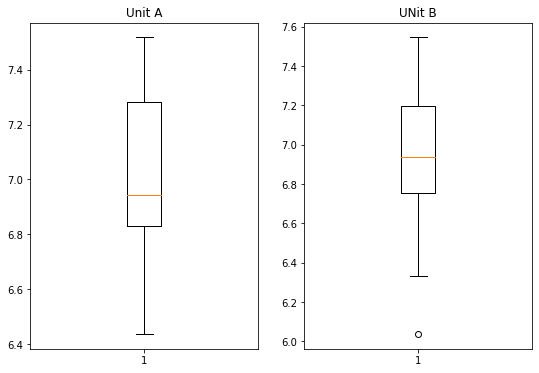

In [29]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('UNit B')
plt.show()

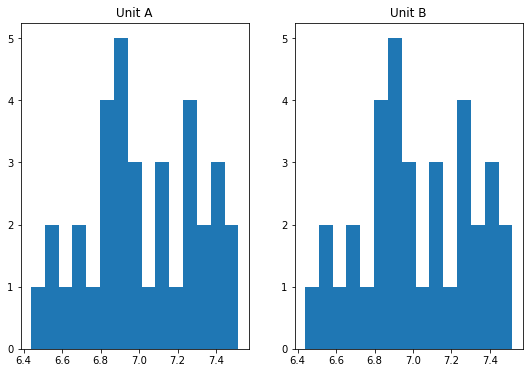

In [32]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins=15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit A'], bins=15)
plt.title('Unit B')
plt.show()

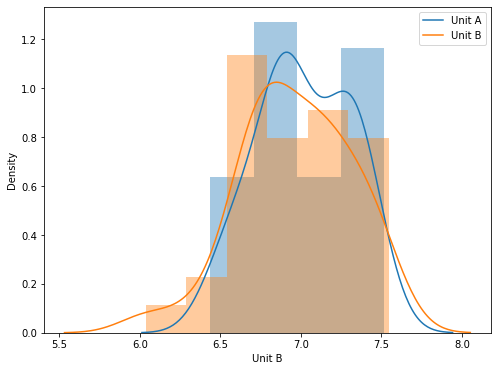

In [38]:
plt.figure(figsize=(8,6))
labels=['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde=True)
sns.distplot(cutlets['Unit B'], hist=True)
plt.legend(labels)

Plotting Q-Q plot to check whether the distribution follows normal distribution or not

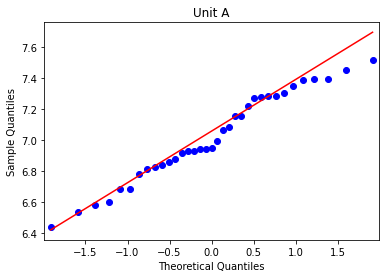

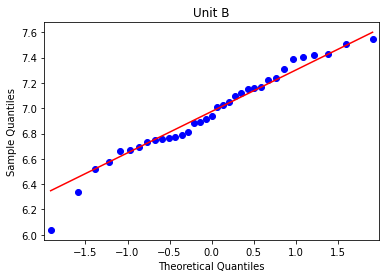

In [39]:
sm.qqplot(cutlets["Unit A"], line='q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line='q')
plt.title('Unit B')
plt.show()

Compare Evidences with Hypothesis using t-statistics

In [45]:
statistic, p_value= stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'], alternative='two-sided')
print('p_value',p_value)


p_value 0.4722394724599501


Compare p_value with  α significance
if p_value is ≠ 'α'we failed to reject Null Hypothesis because of lack of evidence
if p_value='α' we reject Null Hyphothesis

interpreting p-value

In [52]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' %(alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We accept Null hypothesis')


Significnace=0.025, p=0.472
We accept Null hypothesis


Inference is that there is no significant difference in the diameters of Unit A and Unit B

# Answer 2

In [54]:
LabTAT=pd.read_csv('LabTAT.csv')
LabTAT.headad()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [55]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [58]:
Laboratory_1=LabTAT['Laboratory 1'].mean()
Laboratory_2=LabTAT['Laboratory 2'].mean()
Laboratory_3=LabTAT['Laboratory 3'].mean()
Laboratory_4=LabTAT['Laboratory 4'].mean()

In [59]:
print('Laboratory1 Mean:', Laboratory_1)
print('Laboratory2 Mean:', Laboratory_2)
print('Laboratory3 Mean:', Laboratory_3)
print('Laboratory4 Mean:', Laboratory_4)

Laboratory1 Mean: 178.36158333333339
Laboratory2 Mean: 178.9029166666668
Laboratory1 Mean: 199.91325000000003
Laboratory1 Mean: 163.6827499999999


In [60]:
print('Laboratory_1>Laboratory_2=',Laboratory_1 > Laboratory_2)
print('Laboratory_2>Laboratory_3=',Laboratory_2 > Laboratory_3)
print('Laboratory_3>Laboratory_4=',Laboratory_3 > Laboratory_4)
print('Laboratory_4>Laboratory_1=',Laboratory_4 > Laboratory_1)

Laboratory_1>Laboratory_2= False
Laboratory_2>Laboratory_3= False
Laboratory_3>Laboratory_4= True
Laboratory_4>Laboratory_1= False


The Null and Alternative Hypothesis

There are no significant differences between the groups' mean Lab values. H0:μ1=μ2=μ3=μ4

There is a significant difference between the groups' mean Lab values. Ha:μ1≠μ2≠μ3≠μ4

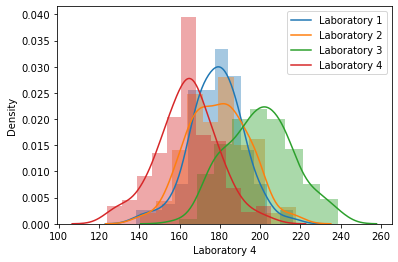

In [63]:
sns.distplot(LabTAT['Laboratory 1'])
sns.distplot(LabTAT['Laboratory 2'])
sns.distplot(LabTAT['Laboratory 3'])
sns.distplot(LabTAT['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

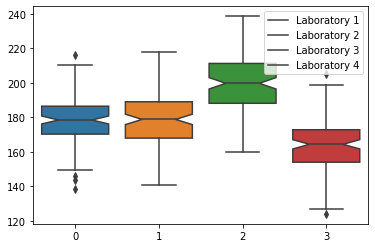

In [68]:
sns.boxplot(data=[LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4']],notch=True)
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

In [69]:
alpha=0.05
Lab1=pd.DataFrame(LabTAT['Laboratory 1'])
Lab2=pd.DataFrame(LabTAT['Laboratory 2'])
Lab3=pd.DataFrame(LabTAT['Laboratory 3'])
Lab4=pd.DataFrame(LabTAT['Laboratory 4'])
print(Lab1,Lab2,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [76]:
tStat, pvalue = stats.f_oneway(Lab1,Lab2,Lab3,Lab4)
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:[2.11567089e-57] T-Statistic:[118.70421654]


In [77]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, pvalue))
if pvalue <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Answer 3

In [86]:
buyer=pd.read_csv('BuyerRatio.csv')
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [87]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [88]:
East=buyer['East'].mean()
West=buyer['West'].mean()
North=buyer['North'].mean()
South=buyer['South'].mean()

print('East Mean=', East)
print('West Mean=', West)
print('North Mean=', North)
print('South Mean=', South)


East Mean= 242.5
West Mean= 832.5
North Mean= 743.5
South Mean= 410.0


The Null and Alternative Hypothesis

There are no significant differences between the groups' mean Lab values. H0:μ1=μ2=μ3=μ4=μ5

There is a significant difference between the groups' mean Lab values. Ha:μ1≠μ2≠μ3≠μ4

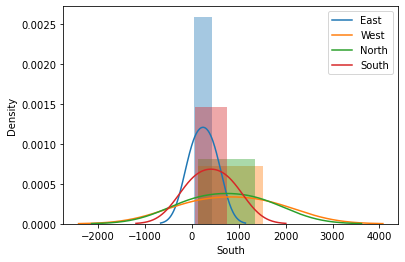

In [92]:
sns.distplot(buyer['East'])
sns.distplot(buyer['West'])
sns.distplot(buyer['North'])
sns.distplot(buyer['South'])
plt.legend(['East','West','North','South'])
plt.show()

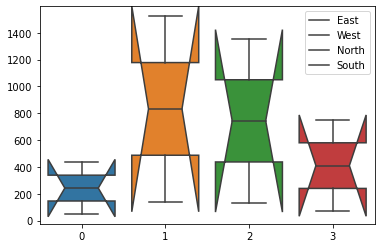

In [95]:
sns.boxplot(data=[buyer['East'],buyer['West'],buyer['North'],buyer['South']], notch=True)
plt.legend(['East','West','North','South'])

In [96]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Table=[Male,Female]
print(Table)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [98]:
chiStats=sp.stats.chi2_contingency(Table)
print('Test t=%f p-value=%f' %(chiStats[0],chiStats[1]))
print('Interpret by p-value')
if chiStats[1]<0.5:
    print('we reject Null Hypothesis')
else:
    print('We accept Null Hypothesis')

Test t=1.595946 p-value=0.660309
Interpret by p-value
We accept Null Hypothesis


In [100]:
#critical value = 0.1
alpha=0.05
critical_value=sp.stats.chi2.ppf(q=1-alpha,df=chiStats[2])# Find the critical value for 95% confidence*
#degree of freedom
observed_chi_val=chiStats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
print('Interpret by critical value')
if observed_chi_val<=critical_value:
    # observed value is not in critical area therefore we accept null hypothesis
    print('Null hypothesis cannot be rejected(variable are not related)')
else:
     # observed value is in critical area therefore we reject null hypothesis
    print ('Null hypothesis cannot be excepted (variables are not independent)')

Interpret by critical value
Null hypothesis cannot be rejected(variable are not related)


Inference : proportion of male and female across regions is same

# Answer 4

In [101]:
customer=pd.read_csv('Costomer+OrderForm.csv')
customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [102]:
customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [103]:
customer.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [104]:
customer[customer.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [105]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


Checking Values Count in data

In [106]:
print(customer['Phillippines'].value_counts(),'\n',customer['Indonesia'].value_counts(),'\n',customer['Malta'].value_counts(),
      '\n',customer['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


# Creating Contingency table

In [107]:
contingency_table=[[271,267,269,280],[29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


Calculating Expected Values for Observed data

In [110]:
stat, p, df, exp=stats.chi2_contingency(contingency_table)
print('statistics:=',stat,"\n", 'p-value:=',p,"\n", 'degree of freedom:=',df,"\n",'expected values:=',exp)

statistics:= 3.858960685820355 
 p-value:= 0.2771020991233135 
 degree of freedom:= 3 
 expected values:= [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


Defining Expected values and observed values

In [112]:
observed=np.array([271,267,269,280,29,33,31,20])
expected=np.array([271.75, 271.75, 271.75, 271.75,28.25,28.25,28.25,28.25])

# Compare Evidences with Hypothesis using t-statictic

In [121]:
test_static, p_value=stats.chisquare(observed,expected,ddof=df)
print('test_static=',test_static,'\n','p-value=',p_value)

test_static= 3.858960685820355 
 p-value= 0.4254298144535761


Plotting the data

In [123]:
alpha=0.05
print('significance=%.3f, p=%.3f' % (alpha,p_value))
if (p_value<alpha):
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null hypothesis')


significance=0.050, p=0.425
We fail to reject Null hypothesis
